## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zuoo5\Anaco

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 214us/step - loss: 1.9285 - acc: 0.3017 - val_loss: 1.7915 - val_acc: 0.3629
Epoch 2/100
50000/50000 [==============================] - 3s 70us/step - loss: 1.7048 - acc: 0.3891 - val_loss: 1.6704 - val_acc: 0.4036
Epoch 3/100
50000/50000 [==============================] - 3s 69us/step - loss: 1.6227 - acc: 0.4197 - val_loss: 1.5764 - val_acc: 0.4448
Epoch 4/100
50000/50000 [==============================] - 4s 70us/step - loss: 1.5542 - acc: 0.4441 - val_loss: 1.5212 - val_acc: 0.4591
Epoch 5/100
50000/50000 [==============================] - 4s 70us/step - loss: 1.4960 - acc: 0.4681 - val_loss: 1.4931 - val_acc: 0.461463 - acc: 0
Epoch 6/100
50000/50000 [==============================] - 3s 70us/step - loss: 1.4633 - acc: 0.4779 - val_loss: 1.4691 - val_acc: 0.4778
Epoch 7/100
50000/50000 [==============================] - 3s 69us/step - loss: 1.4396 - acc: 0.4857 - val_lo

50000/50000 [==============================] - 3s 70us/step - loss: 0.5254 - acc: 0.8118 - val_loss: 2.0770 - val_acc: 0.5045
Epoch 59/100
50000/50000 [==============================] - 3s 69us/step - loss: 0.5370 - acc: 0.8108 - val_loss: 2.0454 - val_acc: 0.5173
Epoch 60/100
50000/50000 [==============================] - 3s 70us/step - loss: 0.5313 - acc: 0.8092 - val_loss: 2.0468 - val_acc: 0.5146- loss: 0.5184 - acc: 0.8 - ETA: 1s - loss:
Epoch 61/100
50000/50000 [==============================] - 3s 70us/step - loss: 0.5271 - acc: 0.8113 - val_loss: 2.1732 - val_acc: 0.5046
Epoch 62/100
50000/50000 [==============================] - 3s 69us/step - loss: 0.5130 - acc: 0.8151 - val_loss: 2.0709 - val_acc: 0.5107
Epoch 63/100
50000/50000 [==============================] - 3s 69us/step - loss: 0.4861 - acc: 0.8248 - val_loss: 2.1896 - val_acc: 0.4992
Epoch 64/100
50000/50000 [==============================] - 3s 69us/step - loss: 0.4908 - acc: 0.8256 - val_loss: 2.1479 - val_acc: 0.51

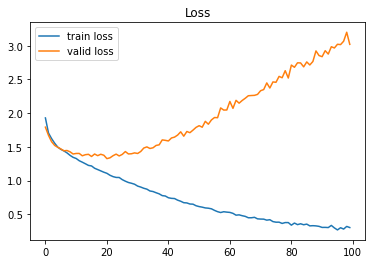

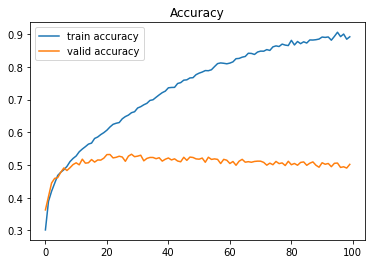

In [7]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢